# Homework 5: Hypothesis Testing

This assignment is due Tuesday, April 14 at 11:59 PM. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Reading: Chapter [10](https://www.inferentialthinking.com/chapters/10/testing-hypotheses.html).

Run the cell below to prepare the notebook and the tests. **Passing the automatic tests does not guarantee full credit on any question.** The tests are provided to help catch some common errors, but it is *your* responsibility to answer the questions correctly.

In [5]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw05.ok')
_ = ok.auth(inline=True)

Assignment: Homework 5: Hypothesis Testing
OK, version v1.14.20

Successfully logged in as A01024536@itesm.mx


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [44]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw05.ipynb'.
Submit... 100% complete
Submission successful for user: A01024536@itesm.mx
URL: https://okpy.org/tec/tc2031/sp20/hw05/submissions/l25GoV



## 1. Catching Cheaters


Suppose you are a casino owner, and your casino runs a very simple game of chance.  The dealer flips a coin.  The customer wins \\$9 from the casino if it comes up heads and loses \\$10 if it comes up tails.

**Question 1.** Assuming no one is cheating and the coin is fair, if a customer plays twice, what is the chance they make money?

In [7]:
p_winning_after_two_flips = 0.25

In [8]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



A certain customer plays the game 20 times and wins 13 of the bets.  You suspect that the customer is cheating!  That is, you think that their chance of winning is higher than the normal chance of winning.

You decide to test your hunch using the outcomes of the 20 games you observed.

**Question 2.** Define the null hypothesis and alternative hypothesis for this investigation.

**Null hypothesis:** the chance of winning is the normal expected chance as if the coin is fair and the player is not cheating.

**Alternative hypothesis:** the change of winning is higher than the normal expected chance.

<div class="hide">\pagebreak</div>

**Question 3.** Given the outcome of 20 games, which of the following test statistics would be a reasonable choice for this hypothesis test?

1. Whether there is at least one win.
1. Whether there is at least one loss.
1. The number of wins.
1. The number of wins minus the number of losses.
1. The total variation distance between the probability distribution of a fair coin and the observed distribution of heads and tails.
1. The total amount of money that the customer won.

Assign `reasonable_test_statistics` to a **list** of numbers corresponding to these test statistics.

In [13]:
reasonable_test_statistics = [3, 4, 6]

In [14]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Write a function called `simulate`.  It should take no arguments.  It should return the number of wins in 20 games simulated under the assumption that the result of each game is sampled from a fair coin.

In [22]:
def simulate():
    return int(20 * sample_proportions(20, [0.5, 0.5])[0])
x = simulate()
x

11

In [23]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Using a 10,000 trial simulation, generate a histogram of the empirical distribution of the number of wins in 20 games.

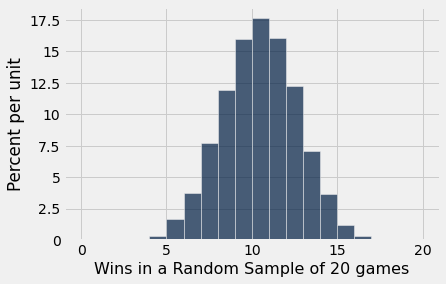

In [27]:
wins = make_array()
for i in np.arange(10000):
    wins = np.append(wins, simulate())
Table().with_column(
    'Wins in a Random Sample of 20 games', wins
).hist(bins = np.arange(0, 21, 1))
    

<div class="hide">\pagebreak</div>

**Question 6.** Compute an empirical P-value for this test.

In [35]:
p_value = np.count_nonzero(wins  >= 13) / 10000
p_value

0.125

In [36]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 7.**
Suppose you use a P-value cutoff of 1%, according to the arbitrary conventions of hypothesis testing.  What do you conclude?

In [37]:
np.count_nonzero(wins  >= 13) / 10000

0.125

The customer's results are compatible with the null hypothesis. The number we got is 12.5% and this is not statistically significant.

**Question 8.** Is `p_value` the probability that the customer cheated, or the probability that the customer didn't cheat, or neither?

Neither. This is the probability of obtaining results as least as extreme as in the observed statistic, i.e. the probability of the number of winnings to be at least 13.

**Question 9.**
Is 1% (the P-value cutoff) the probability that the customer cheated, or the probability that the customer didn't cheat, or neither?

Is the convention that p_values less than 1% are significant because they are unusual and may conflict with the null hypothesis.

**Question 10**.
Suppose you run this test for 400 different customers after observing each customer play 20 games.  When you reject the null hypothesis for a customer, you accuse that customer of cheating.  If no customer were actually cheating, how many would you expect to accuse, on average (if any)?  Assume a 1% P-value cutoff. Explain your answer.

I would expect to accuse 4 people. Because, if the cutoff is 1% and the null hypothesis is true, there is about a 1% chance that I will conclude that the alternative is true.

## 2. Landing a Spacecraft


(Note: This problem describes something that's close to [a real story with a very exciting video](http://www.space.com/29119-spacex-reusable-rocket-landing-crash-video.html), but the details have been changed somewhat.)

SpaceY, a company that builds and tests spacecraft, is testing a new reusable launch system.  Most spacecraft use a "first stage" rocket that propels a smaller payload craft away from Earth, then falls back to the ground and crashes.  SpaceY's new system is designed to land safely at a landing pad at a certain location, ready for later reuse.  If it doesn't land in the right location, it crashes, and the (very expensive) vehicle is destroyed.

SpaceY has tested this system over 1000 times.  Ordinarily, the vehicle doesn't land exactly on the landing pad.  For example, a gust of wind might move it by a few meters just before it lands.  It's reasonable to think of these small errors as random.  That is, the landing locations are drawn from some distribution over locations on the surface of Earth, centered around the landing pad.

Run the next cell to see a plot of those locations.

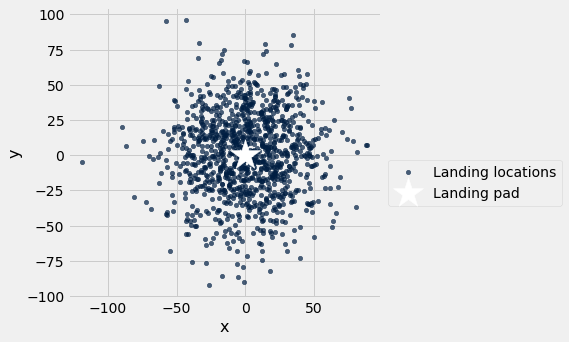

In [38]:
ordinary_landing_spots = Table.read_table("ordinary_landing_spots.csv")
ordinary_landing_spots.scatter("x", label="Landing locations")
plots.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plots.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

During one test, the vehicle lands far away from the landing pad and crashes.  SpaceY investigators suspect there was a problem unique to this landing, a problem that wasn't part of the ordinary pattern of variation in landing locations.  They think a software error in the guidance system caused the craft to incorrectly attempt to land at a spot other than the landing pad.  The guidance system engineers think there was nothing out of the ordinary in this landing, and that there was no special problem with the guidance system.

Run the cell below to see a plot of the 1100 ordinary landings and the crash.

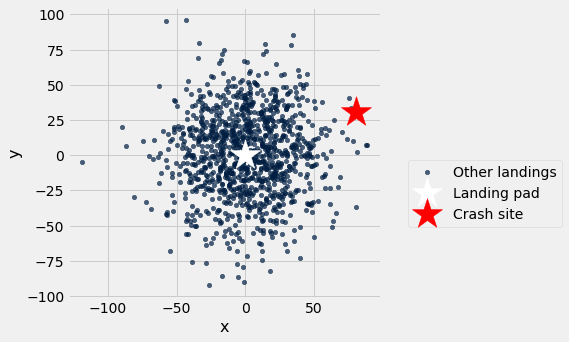

In [39]:
landing_spot = make_array(80.59, 30.91)
ordinary_landing_spots.scatter("x", label="Other landings")
plots.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plots.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=1000, label="Crash site")
plots.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

**Question 1.**
Suppose we'd like to use hypothesis testing to shed light on this question.  We've written down an alternative hypothesis below.  What is a reasonable null hypothesis?

**Null hypothesis:** The landing was not special and follows the same distribution as the other 1100 landings

**Alternative hypothesis:** This landing was special; its location was a draw from some other distribution, not the distribution from which the other 1100 landing locations were drawn.

**Question 2.**
What's a good test statistic?

**Test statistic:** The distance from the landing point to the landing pad

**Question 3.**
Write a function called `landing_test_statistic`.  It should take two arguments: an "x" location and a "y" location (both numbers).  It should return the value of your test statistic for a landing at those coordinates.

In [42]:
def landing_test_statistic(x_coordinate, y_coordinate):
    return np.sqrt(x_coordinate*x_coordinate+y_coordinate*y_coordinate)

**Question 4.**
The cell below computes a P-value using your test statistic.  Describe the test procedure in words.  Is there a simulation involved?  If so, what is being simulated? If not, why not?

In [43]:
test_stat = landing_test_statistic(
    landing_spot.item(0),
    landing_spot.item(1))

null_stats = make_array()
for i in np.arange(ordinary_landing_spots.num_rows):
    null_stat = landing_test_statistic(
        ordinary_landing_spots.column('x').item(i),
        ordinary_landing_spots.column('y').item(i))
    null_stats = np.append(null_stats, null_stat)

p_value = np.count_nonzero(null_stats > test_stat) / len(null_stats)
p_value

0.012727272727272728

The procedure is the following:
1. They define the test statistic as the unusual crash using the function I wrote.
2. They get all the ordinary landing spots from the other 1100 experiments and apply the landing_test_statistic function to all the elements.
3. They compute an empirical p_value from the ordinary landing spots and the test_stat value, this value happens to be 1.27%.

There is no simulation involved, because they are using real data from other landings. The reason they are not simulating is because they don't have a non-empirical way to get the probability distribution of the distance to the landing pad and they cannot just assume a probability distribution.